# Import The Main Librareis


In [99]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Other
import missingno as msno
import os


## Model Selection
from sklearn.model_selection import train_test_split

## Metrics
from sklearn.metrics import mean_squared_error, r2_score

## Preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## Models
from sklearn.linear_model import LinearRegression, SGDRegressor


# Load The Data set

In [2]:
Houses = pd.read_csv(r"C:\Users\Dell\Desktop\Data\1553768847-housing.csv")

In [3]:
Houses.shape

(20640, 10)

In [4]:
Houses.size

206400

In [5]:
Houses.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [6]:
Houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


## check the info (nulls and datatypes)


In [7]:
Houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


## some statistics of the DF --> target column is (median_house_value)


In [8]:
Houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
Houses.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [10]:
Houses.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
ocean_proximity       20640
median_house_value    20640
dtype: int64

## check the nulls and duplicated


In [11]:
Houses.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

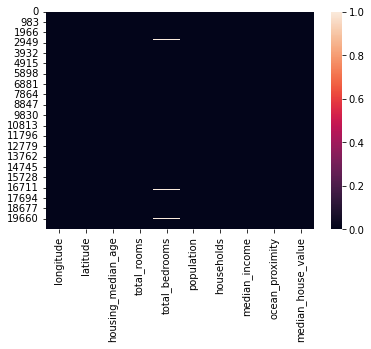

In [12]:
sns.heatmap(Houses.isnull());
plt.show()

In [13]:
Houses.duplicated().sum()

0

# Exploratory Data Analysis (EDA)


Univariate Visualization


In [14]:
Houses.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500


In [15]:
## explor the column
ocean_values = Houses['ocean_proximity'].value_counts(ascending = False)
ocean_values

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

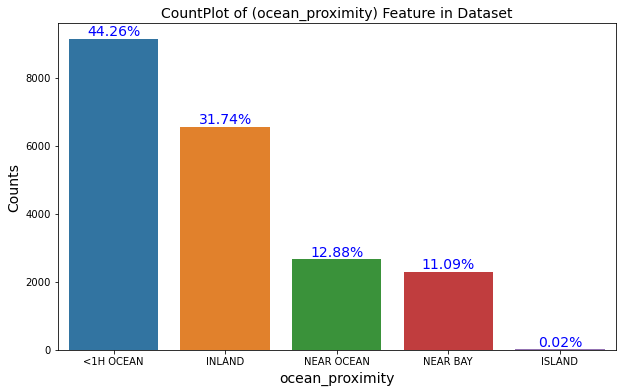

In [16]:
## plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=Houses, order=ocean_values.index)  ## ordered
plt.title('CountPlot of (ocean_proximity) Feature in Dataset', fontsize=14, c='k')
plt.xlabel('ocean_proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

## showing the percenatge
for i in range(ocean_values.shape[0]):
    count = ocean_values[i]
    strt='{:0.2f}%'.format(100*count / Houses.shape[0])
    plt.text(i, count+100, strt, ha='center', color='blue', fontsize=14)



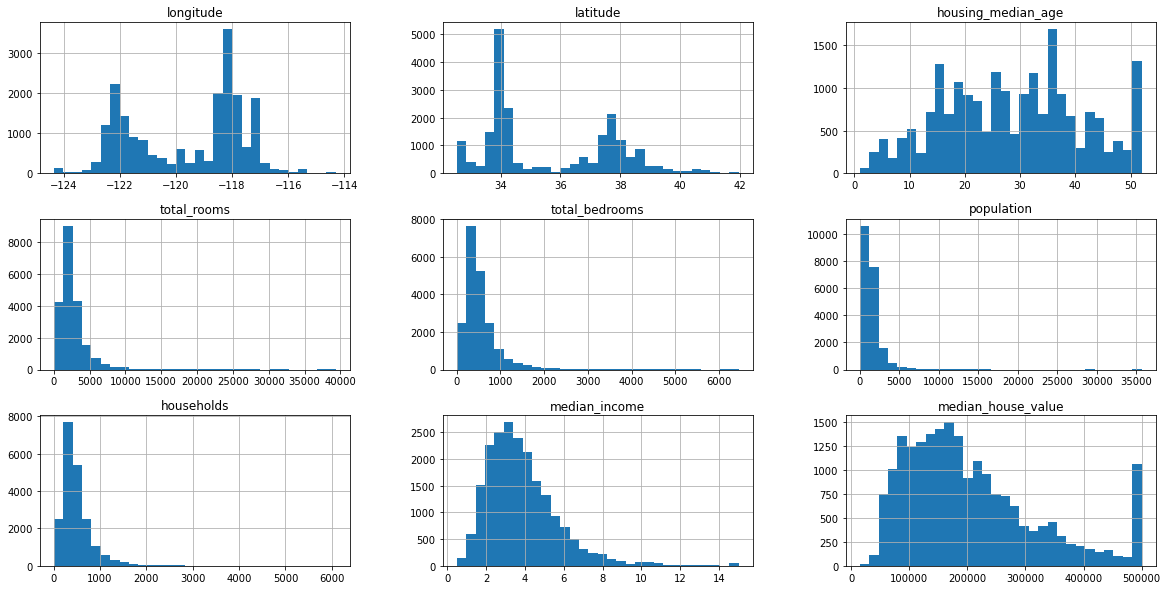

In [17]:
## Histogram Distribution of Numerical Variables in Dataset
Houses.hist(bins=30, figsize=(20,10))
plt.show()

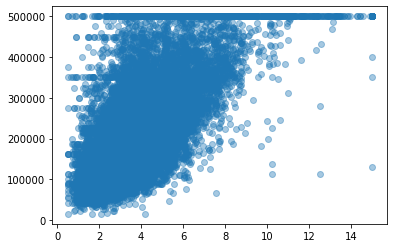

In [18]:
## scatte plot with important features (median_income) with the target (median_house_value)

plt.scatter(Houses['median_income'],Houses['median_house_value'] , alpha=0.4)

<AxesSubplot:>

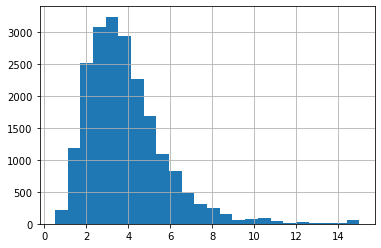

In [19]:
Houses['median_income'].hist(bins=24)

<AxesSubplot:xlabel='median_income', ylabel='count'>

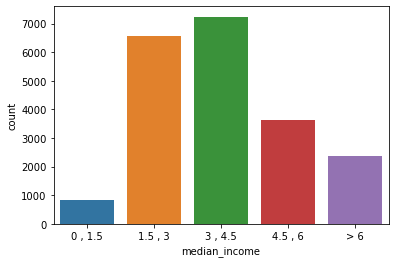

In [20]:
## Try for (median_house_value) to convert it to chunks (bins)

income_bins = pd.cut(x= Houses['median_income'] ,
                     bins = [0 , 1.5 , 3 , 4.5 , 6 , np.inf] ,
                     labels = ['0 , 1.5' , '1.5 , 3' , '3 , 4.5' , '4.5 , 6' , '> 6'])
sns.countplot(x=income_bins)

In [21]:
Houses.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500


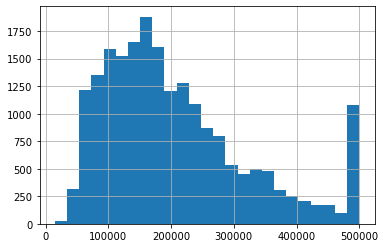

In [22]:
Houses['median_house_value'].hist(bins=25);

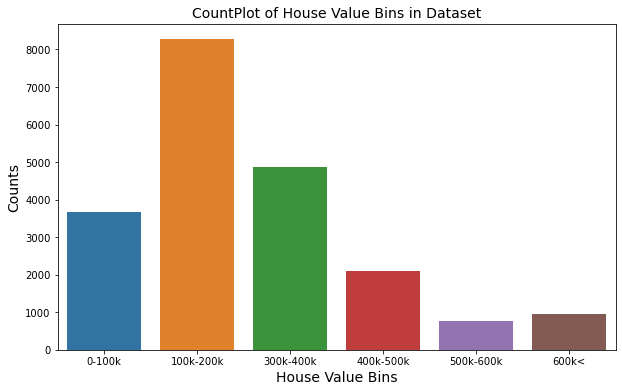

In [23]:

## Try for (median_house_value) to convert it to chunks (bins)
## Cut this numerical feature to categorical for its values to be in range will be in the same category
## In the following example -- any value between range (0-100k) will be the same category, I name it (0-100k)
house_value_bins = pd.cut(x=Houses['median_house_value'], 
                          bins=[0, 100000, 200000, 300000, 400000, 500000, np.inf], 
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])
plt.figure(figsize = (10,6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()




Comment: It seems that the (<1H ocean) is about the half of the dataset the data is biased to this category, someone can think to split the data according to this column using (startified) method if we found that this column is very important, we will discuss that later, Also, it seems that the Distribution of most of features are right skewed (exponential distribution) and it is known that the best distribution to be passed to the model is Normal Distribution, we will go further with these features to know how to deal with these skewed distrbution later, Also the majority of house_value is between (100k-200k), Also the majority of median_income is between (3-4.5), someone can change his mind and split the dataset using (startified) method according to the most important feature as I think till now which is (median_income) but use (income_bins) as the stratified method requires categorical features not numerical


# Bivariate Visualization



In [24]:
Houses.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500


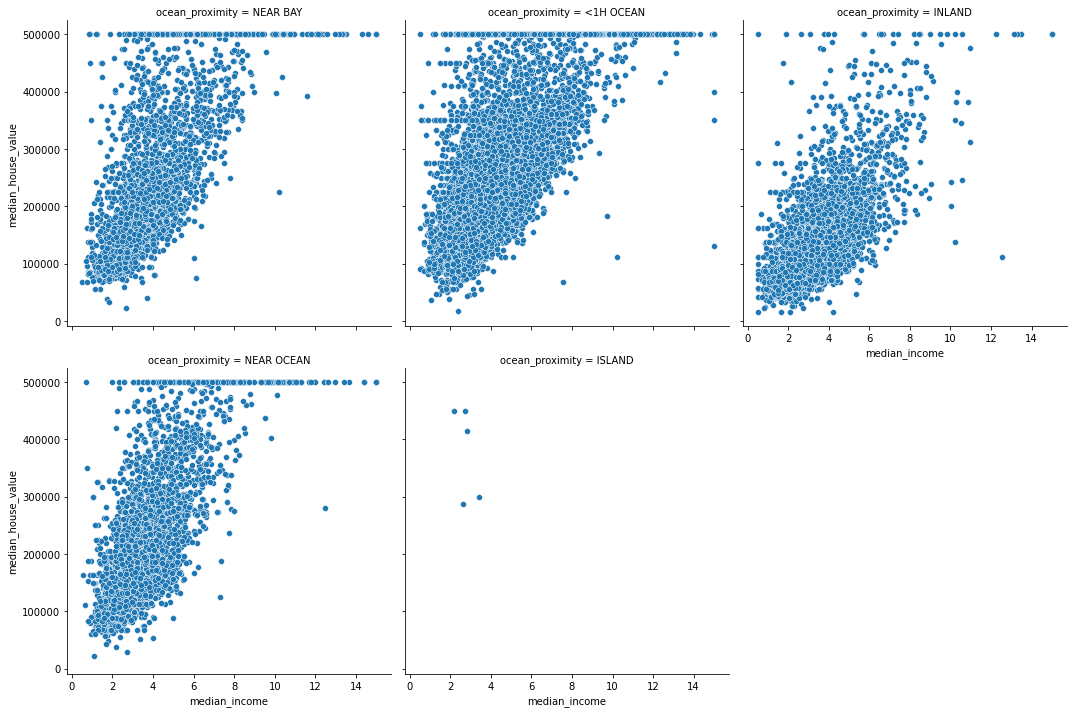

In [25]:
## Scatter plot with (median_income) and (median_house_value) at each (ocean_proximity) 
sns.relplot(x='median_income', y='median_house_value', data=Houses, kind='scatter', 
            col='ocean_proximity', col_wrap=3)
plt.show()

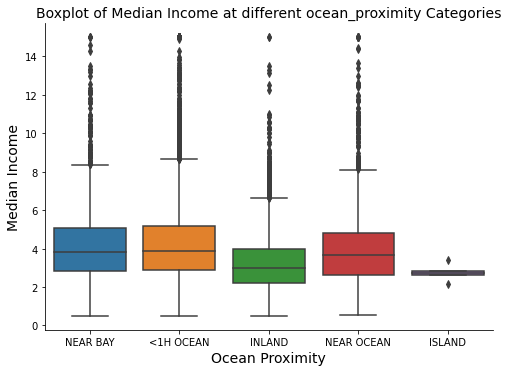

In [26]:
## Check the Boxplot of the (median_income) at different categories of (ocean_proximity)
sns.catplot(y='median_income', x='ocean_proximity', data=Houses, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of Median Income at different ocean_proximity Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

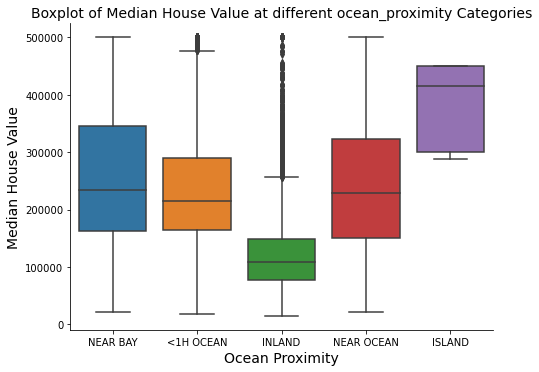

In [27]:
## Check the Boxplot of the (median_house_value) at different categories of (ocean_proximity)
sns.catplot(y='median_house_value', x='ocean_proximity', data=Houses, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of Median House Value at different ocean_proximity Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()


Comment: It seems that the Distribution of median_income is almost the same at ocean_proximity categories, Also, it seems that the INLAND median_income and median_house value is less than other categories and it makes sense


# Multivariate Visualization


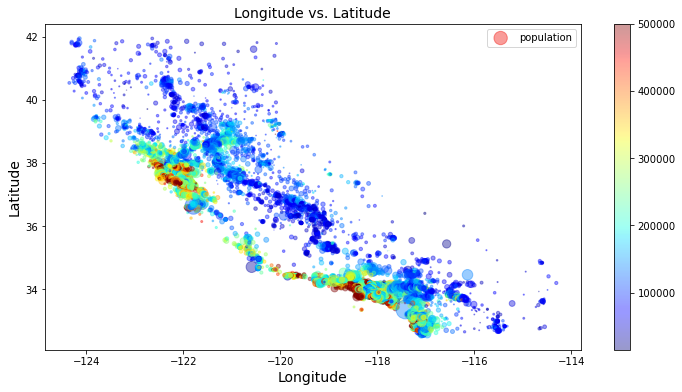

In [28]:
## Scatter plot for (longitued & latitued), and add population as the size of the point and the color as (house_value)
plt.figure(figsize=(12, 6))
sc = plt.scatter(Houses['longitude'], Houses['latitude'], s=Houses['population']/100,
                   alpha=0.4, c=Houses['median_house_value'], cmap=plt.get_cmap('jet'), label='population')
plt.colorbar(sc)
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

Comment: IIt seems that prices is higher near the ocean than other zones, and also these araes have higher population


# Check the Correlation between the Features and the Target


In [29]:
## Correlation (pearson correlation)
Houses.corr()['median_house_value'].sort_values(ascending=False)


C:\Users\Dell\AppData\Local\Temp/ipykernel_8776/2595436847.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Houses.corr()['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

C:\Users\Dell\AppData\Local\Temp/ipykernel_8776/931582567.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Houses.corr(), annot=True, cmap='Blues')  ## symmetric matrix


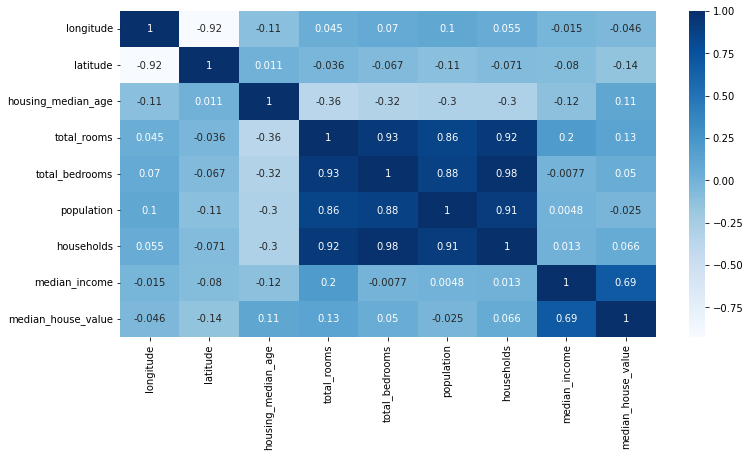

In [30]:
## you can show this as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(Houses.corr(), annot=True, cmap='Blues')  ## symmetric matrix
plt.show()

Comment: It seems that the most correlated Feature with target is (median_income) as I predict that, and feature like (households & population) are less correlated


# Feature Engineering


Try to add some features, thinking that it will be more useful and more correlated to the target



In [31]:
## Try to make some Feature Engineering --> Feature Extraction --> Add the new column to the main DF
Houses['rooms_per_household'] = Houses['total_rooms'] / Houses['households']
Houses['bedroms_per_rooms'] = Houses['total_bedrooms'] / Houses['total_rooms']
Houses['population_per_household'] = Houses['population'] / Houses['households']

In [34]:
Houses.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedroms_per_rooms,population_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,6.984127,0.146591,2.555556
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,6.238137,0.155797,2.109842


In [37]:
## check the correlation again

Houses.corr()['median_house_value'].sort_values(ascending=False)


C:\Users\Dell\AppData\Local\Temp/ipykernel_8776/239332286.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Houses.corr()['median_house_value'].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

Comment:Some progress for out new features (very good), Strong correlation



# Split the Dataset


In [41]:
## Split the Whole dataset to features and target
X = Houses.drop(columns='median_house_value' , axis=1) ##features
y = Houses['median_house_value']  ##target

In [59]:
## Random split the dataset to two sets (train_set, valid_set, test_set)
## Firstly split to (train_full_set, test_set) then split (train_full_set) to (train_set, valid_set)
## Firstly
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=123, shuffle=True)
## secondly

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.15,
                                                      random_state=152, shuffle=True)

In [60]:
## check shape
print('X_train_full shape -- ', X_train_full.shape)
print('y_train_full shape -- ', y_train_full.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)
print('X_train shape -- ', X_train.shape)
print('X_valid shape -- ', X_valid.shape)
print('y_train shape -- ', y_train.shape)
print('y_valid shape -- ', y_valid.shape)

X_train_full shape --  (17544, 12)
y_train_full shape --  (17544,)
X_test shape --  (3096, 12)
y_test shape --  (3096,)
X_train shape --  (14912, 12)
X_valid shape --  (2632, 12)
y_train shape --  (14912,)
y_valid shape --  (2632,)


# Dealing with nulls


In [78]:
## Separete the columns according to type (numerical or categorical)

num_columns =[col for col in X_train.columns if X_train[col].dtype in ['float64', 'int64'] ]
cat_columns =[col for col in X_train.columns if X_train[col].dtype not in ['float64', 'int64'] ]
print('num_columns: \n',num_columns)
print('*'*50)
print('cat_columns: \n',cat_columns)

num_columns: 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedroms_per_rooms', 'population_per_household']
**************************************************
cat_columns: 
 ['ocean_proximity']


Building a pipeline is much easier and better while inference at new dataset



# Standardize the Dataset




In [89]:

## Building a pipeline for numerical variables
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_num = num_pipline.fit_transform(X_train[num_columns])
X_valid_num = num_pipline.transform(X_valid[num_columns])
X_test_num = num_pipline.transform(X_test[num_columns])  ## much easier and much better

# Categorical Features 


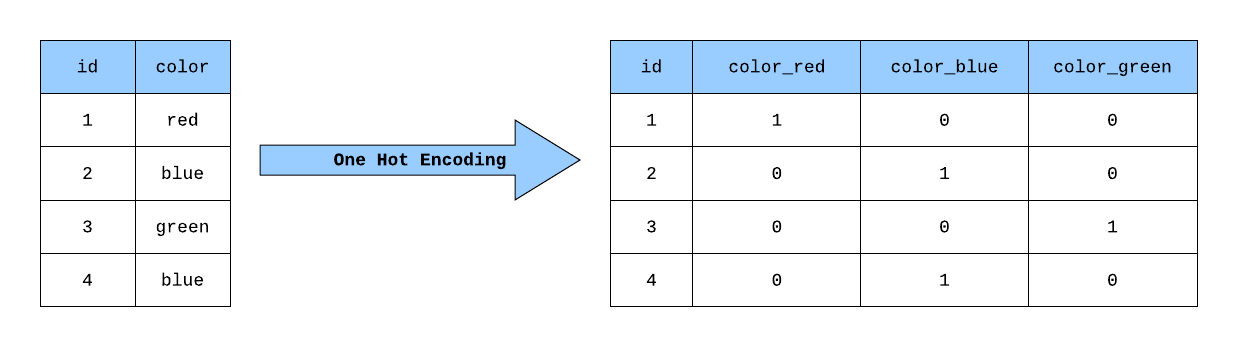

In [91]:
## Define pipeline for categorical columns --> use OneHotEncoder = OHE
categ_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False))])


## deal with (categ_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_categ = categ_pipeline.fit_transform(X_train[cat_columns])
X_valid_categ = categ_pipeline.transform(X_valid[cat_columns])
X_test_categ = categ_pipeline.transform(X_test[cat_columns])  ## much easier and much better


  
#  Get all Together


In [96]:
## We can get much much easier like the following
## numerical pipeline
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_columns)),    ## select only these columns
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(cat_columns)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False))])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                ('num_pip', num_pipeline),
                                ('categ_pipeline', categ_pipeline)])

## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_valid_final = total_pipeline.transform(X_valid)
X_test_final = total_pipeline.transform(X_test)                 ### Every thing is processed :D

# Building ML Models


Evaluation Metric: RMSE



### LinearRegression


In [101]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)  ## train


LinearRegression()

In [102]:
## prediction
y_pred_train_lin = lin_reg.predict(X_train_final)  ## predict the training data
y_pred_valid_lin = lin_reg.predict(X_valid_final)  ## predict the training data

## RMSE
rmse_train_lin = (mean_squared_error(y_train, y_pred_train_lin))**0.5
rmse_valid_lin = (mean_squared_error(y_valid, y_pred_valid_lin))**0.5

## R2 score
r2_train_lin = r2_score(y_train, y_pred_train_lin)
r2_valid_lin = r2_score(y_valid, y_pred_valid_lin)


print(f'RMSE for training set using LinearRegression -- {rmse_train_lin:.3f}')
print(f'RMSE for validating set using LinearRegression -- {rmse_valid_lin:.3f}')   
print('**'*40)
print(f'R2 Score for training set using LinearRegression -- {r2_train_lin:.3f}')
print(f'R2 Score for validating set using LinearRegression -- {r2_valid_lin:.3f}')      ## not bad

RMSE for training set using LinearRegression -- 67532.171
RMSE for validating set using LinearRegression -- 68848.145
********************************************************************************
R2 Score for training set using LinearRegression -- 0.657
R2 Score for validating set using LinearRegression -- 0.636


SGDRegression

In [103]:

## define the model --> ## initialize some random Hyperparameter --> we will tune later
sgd_reg = SGDRegressor(penalty=None, eta0=0.001, shuffle=True, max_iter=10000)  
sgd_reg.fit(X_train_final, y_train)  ## train the model


SGDRegressor(eta0=0.001, max_iter=10000, penalty=None)

In [104]:
## prediction
y_pred_train_sgd = sgd_reg.predict(X_train_final)  ## predict the training data
y_pred_valid_sgd = sgd_reg.predict(X_valid_final)  ## predict the training data

## RMSE
rmse_train_sgd = (mean_squared_error(y_train, y_pred_train_sgd))**0.5
rmse_valid_sgd = (mean_squared_error(y_valid, y_pred_valid_sgd))**0.5

## R2 score
r2_train_sgd = r2_score(y_train, y_pred_train_sgd)
r2_valid_sgd = r2_score(y_valid, y_pred_valid_sgd)


print(f'RMSE for training set using SGDRegression -- {rmse_train_sgd:.3f}')
print(f'RMSE for validating set using SGDRegression -- {rmse_valid_sgd:.3f}')   
print('**'*40)
print(f'R2 Score for training set using SGDRegression -- {r2_train_sgd:.3f}')
print(f'R2 Score for validating set using SGDRegression -- {r2_valid_sgd:.3f}')         ## not bad


RMSE for training set using SGDRegression -- 67643.428
RMSE for validating set using SGDRegression -- 68879.246
********************************************************************************
R2 Score for training set using SGDRegression -- 0.656
R2 Score for validating set using SGDRegression -- 0.636
